# Analysis of PCCs for the iPCA over the BRAF PDB deposited structures
Firstly lets make rankings of the most correlated ones.
Use the PDB code from earlier to put into a pyMol of the top ones.
Also make a coloured PDB from scores.

In [ ]:
import h5py
import numpy as np
import mdtraj as md
from itertools import combinations
traj = md.load("./all_frames/traj.pdb")
ca_atoms = [a.index for a in traj.top.atoms if a.name == "CA" ]
traj.atom_slice(ca_atoms,inplace=True)
hdf = h5py.File("./PCCs.h5","r")
combis = np.array([*combinations([*range(traj.n_atoms)],2)])

def finder(index_tuple,traj):
    atoms

In [ ]:
# first_comp = hdf["PCCs"][:,0]
comp2 = hdf["PCCs"][:,1]
sort = np.argsort(np.absolute(comp2))
print(f"MAX: {np.max(comp2)}")
print(f"MIN: {np.min(comp2)}")
hdf["PCCs"].shape

In [ ]:
for x in range(1,30):
    dist = combis[sort[-x]]
    for i in dist:
        print(traj.top._residues[i])
    print(comp2[sort[-x]])
    print("\n")

In [48]:
"""
Before running this load PyMol -R and load 2.pdd and rename to top!
"""
import socket
import os
import xmlrpc.client as xmlrpclib
import pickle
import numpy as np
from matplotlib import pyplot as plt
from pprint import pprint as pp
HOST = 'localhost'  # Standard loopback interface address (localhost)
PORT = 9123        # Port to listen on (non-privileged ports are > 1023)
srv = xmlrpclib.ServerProxy('http://localhost:9123')
cmd = f"dss"
srv.do(cmd)
cmd = f"set_name strided2, top"
srv.do(cmd)
cmd = f"set float_labels, on"
srv.do(cmd)
cmd = f"scene default, store"
srv.do(cmd)
for x in range(1,101):
    (i,j) = [traj.top._residues[a].resSeq for a in combis[sort[-x]]]
    sele1 = f"/top//A/{i}/CA"
    sele2 = f"/top//A/{j}/CA"
    cmd = f"distance dist{x}, {sele1}, {sele2}"
    srv.do(cmd)
    cmd = f"center dist{x}"
    srv.do(cmd)
    cmd = f"label {sele1}, '%s-%s' % (resn,resi)"
    srv.do(cmd)
    cmd = f"pseudoatom cor{x},selection='top'; label cor{x}, 'PCC Value: %s' % ({str(round(comp2[sort[-x]],3))})"
    srv.do(cmd)
    cmd = f"label {sele2}, '%s-%s' % (resn,resi)"
    srv.do(cmd)
    cmd = "bg_color white"
    srv.do(cmd)
#     cmd = f"set cartoon_transparency,0.5, not ({sele1} or {sele2})"
#     srv.do(cmd)
    if comp2[sort[-x]] > 0:
        cmd = f"color red, {sele1}"
        srv.do(cmd)
        cmd = f"color red, {sele2}"
        srv.do(cmd)
    if comp2[sort[-x]] < 0:
        cmd = f"color blue, {sele1}"
        srv.do(cmd)
        cmd = f"color blue, {sele2}"
        srv.do(cmd)
    cmd = f"scene distance{x}, store"
    srv.do(cmd)
    cmd = f"disable cor{x}"
    srv.do(cmd)
    cmd = f"color green, top"
    srv.do(cmd)
    cmd = f"hide labels, {sele1}"
    srv.do(cmd)
    cmd = f"hide labels, {sele2}"
    srv.do(cmd)
    cmd = f"disable dist{x}"
    srv.do(cmd)


In [ ]:
hdf.close()

In [ ]:
sort

In [ ]:
combis.shape

In [ ]:
hdf["PCCs"].shape

In [6]:
(i,j) = [traj.top._residues[a] for a in combis[sort[-x]]]
print(i,j)

LEU536 ARG602


In [7]:
i.resSeq

536

In [24]:
round(comp2[sort[-x]],4
    )

-0.9268

In [44]:
str(round(comp2[sort[-x]],3))

'-0.973'

  1%|          | 880/165025 [00:00<00:37, 4416.99it/s]

Calculating DCC...
n_iterations:    165025


100%|██████████| 165025/165025 [00:37<00:00, 4400.25it/s]


Time taken:  37.50483679771423 seconds
Time taken:  0.6250806132952372 minutes




  0%|          | 364/165025 [00:00<00:45, 3635.63it/s]

Calculating DCC...
n_iterations:    165025


100%|██████████| 165025/165025 [00:41<00:00, 3956.45it/s]


Time taken:  41.7119677066803 seconds
Time taken:  0.695199461778005 minutes




  0%|          | 367/165025 [00:00<00:44, 3661.66it/s]

Calculating DCC...
n_iterations:    165025


100%|██████████| 165025/165025 [00:40<00:00, 4028.96it/s]


Time taken:  40.96094632148743 seconds
Time taken:  0.6826824386914571 minutes




  0%|          | 408/165025 [00:00<00:40, 4078.00it/s]

Calculating DCC...
n_iterations:    165025


100%|██████████| 165025/165025 [00:40<00:00, 4115.93it/s]


Time taken:  40.095725774765015 seconds
Time taken:  0.6682620962460836 minutes




  0%|          | 370/165025 [00:00<00:44, 3697.83it/s]

Calculating DCC...
n_iterations:    165025


100%|██████████| 165025/165025 [00:44<00:00, 3691.80it/s]


Time taken:  44.70176839828491 seconds
Time taken:  0.7450294733047486 minutes




  0%|          | 347/165025 [00:00<00:47, 3465.78it/s]

Calculating DCC...
n_iterations:    165025


100%|██████████| 165025/165025 [00:46<00:00, 3585.22it/s]


Time taken:  46.0305962562561 seconds
Time taken:  0.767176604270935 minutes




  1%|          | 908/165025 [00:00<00:18, 9073.54it/s]

Calculating DCC...
n_iterations:    165025


100%|██████████| 165025/165025 [00:16<00:00, 10065.77it/s]


Time taken:  16.396578073501587 seconds
Time taken:  0.27327630122502644 minutes




  1%|          | 839/165025 [00:00<00:38, 4211.91it/s]

Calculating DCC...
n_iterations:    165025


100%|██████████| 165025/165025 [00:41<00:00, 3996.86it/s]


Time taken:  41.290101528167725 seconds
Time taken:  0.6881683588027954 minutes




  0%|          | 374/165025 [00:00<00:44, 3730.48it/s]

Calculating DCC...
n_iterations:    165025


100%|██████████| 165025/165025 [00:40<00:00, 4121.07it/s]


Time taken:  40.04586601257324 seconds
Time taken:  0.667431100209554 minutes




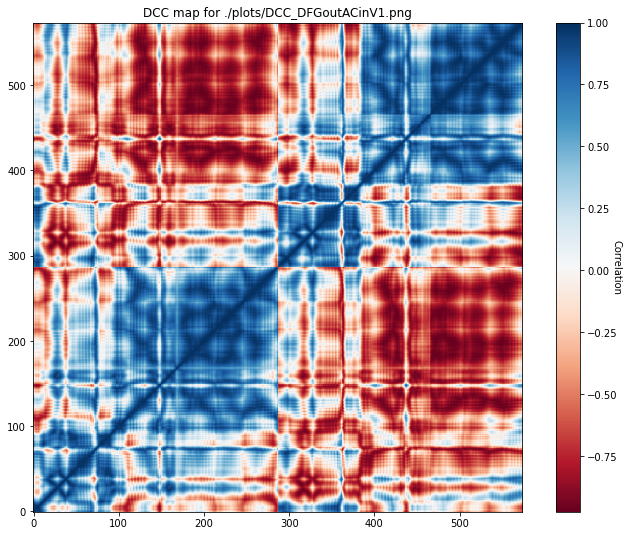

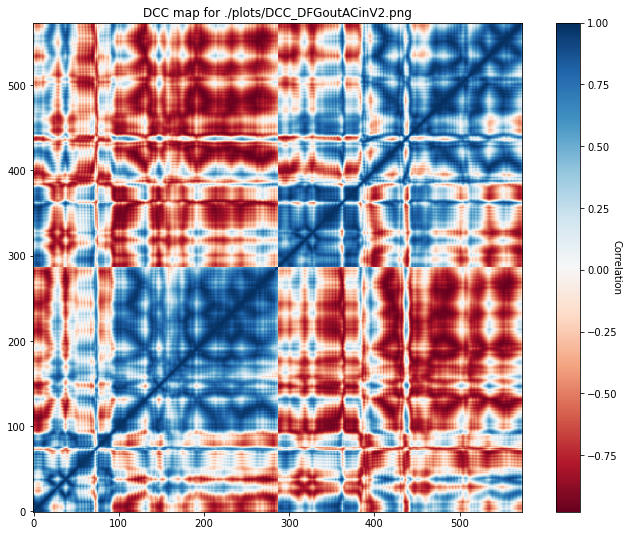

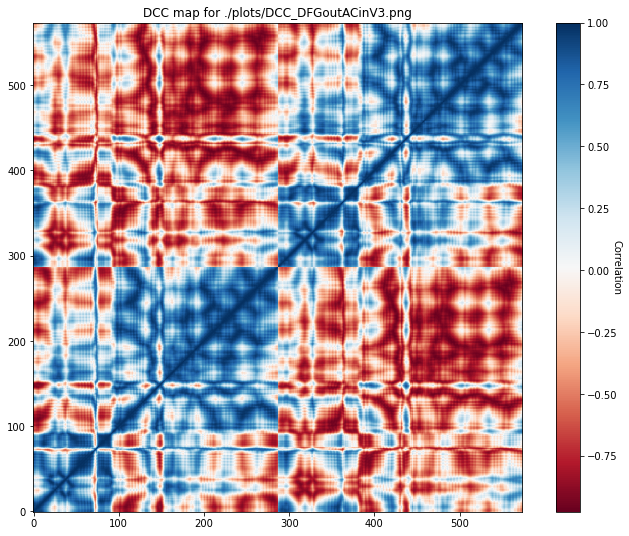

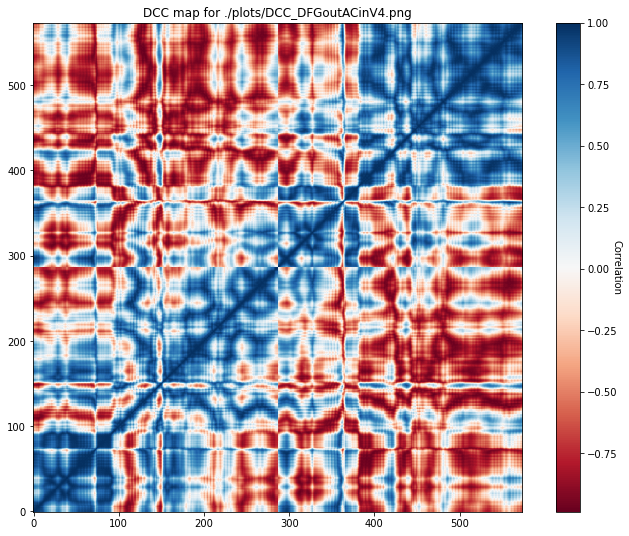

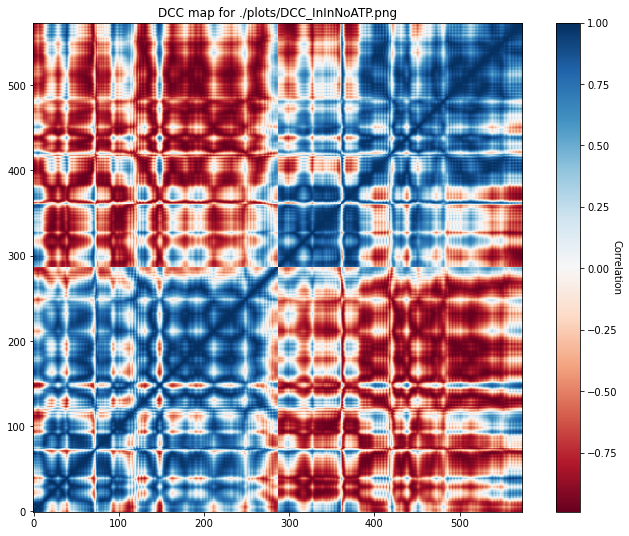

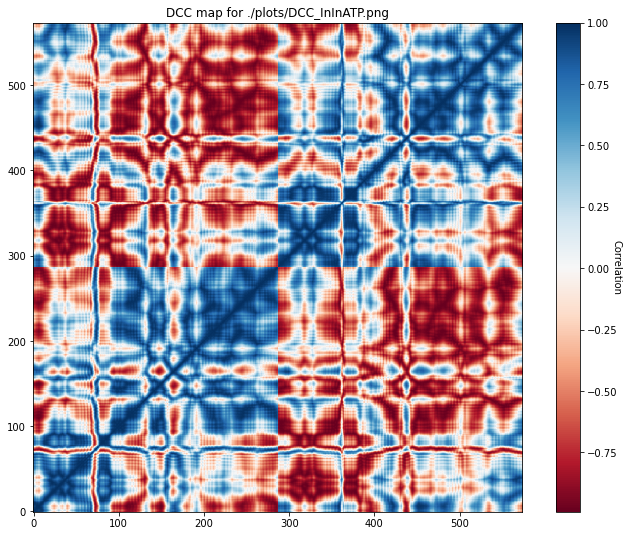

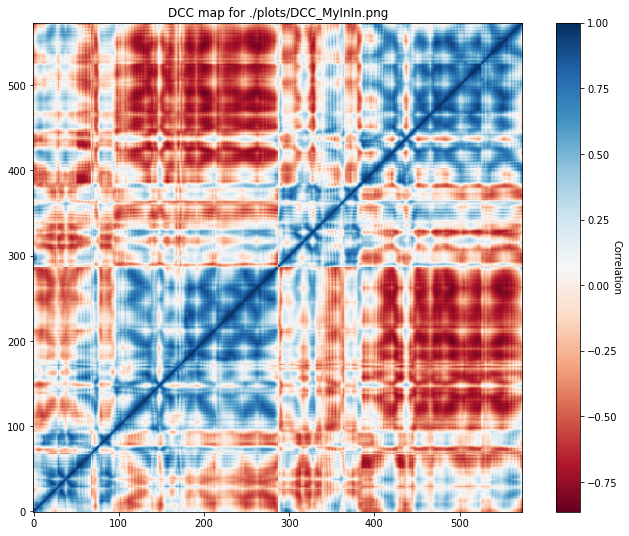

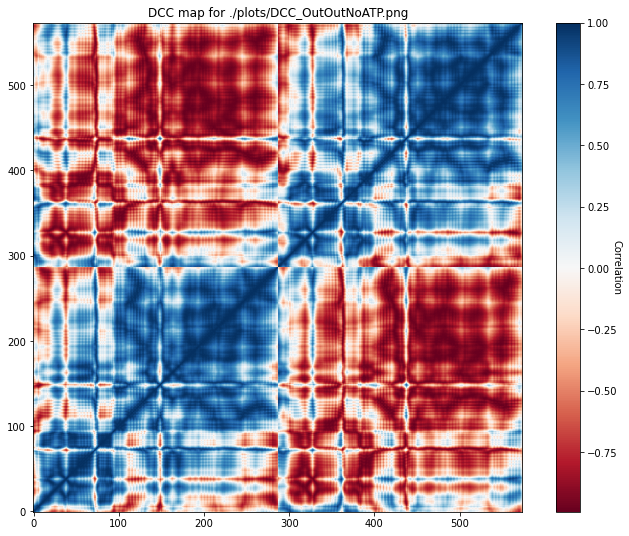

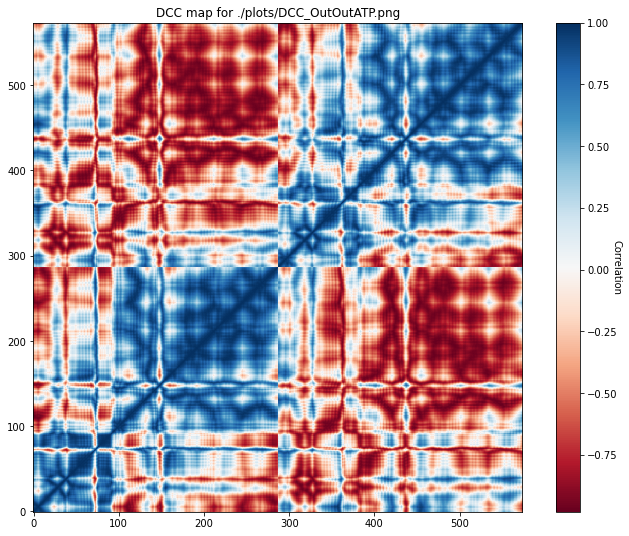

In [50]:
import numpy as np
import mdtraj as md
import h5py as h
import pickle
import matplotlib.pyplot as plt
from time import time as t
from os import system as sys
from pprint import pprint as pp
from IPython import embed as e
from scipy.stats import pearsonr as pcc
from scipy.spatial import distance_matrix as dm
from itertools import combinations_with_replacement as combinations
from tqdm import tqdm
## This script is to take calculate PCC contact maps!
def plotDCCmap(dcc_array,name):
    fig = plt.figure(figsize=(12,9))
    ax = fig.add_subplot(111)

    im = ax.imshow(dcc_array,cmap="RdBu")
    cbar = fig.colorbar(im)
    cbar.set_label("Correlation",rotation=270)
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_title(f"DCC map for {name}")

    plt.savefig(name) # Note difference to otehr function
def calc_dcc(arr):
    # arr is of vector shape (frames,atoms,3)
    def delta_r(i):
        r_i = arr[:,i]
        avg_pos = np.mean(r_i,axis=0)
        delta = r_i - avg_pos
        return delta

    def numerator(r_i,r_j):
        ans = (r_i * r_j).sum(axis=1)
        ans = np.mean(ans,axis=0)
        return ans


    def denominator(r_i,r_j):
        mag_i = (r_i*r_i).sum(axis=1)
        mag_j = (r_j*r_j).sum(axis=1)

        mag_i = np.mean(mag_i,axis=0)
        mag_j = np.mean(mag_j,axis=0)

        mag_i = np.sqrt(mag_i)
        mag_j = np.sqrt(mag_j)

        return mag_i * mag_j


    def dcc(i,j):
        r1 = delta_r(i)
        r2 = delta_r(j)
        return numerator(r1,r2) / denominator(r1,r2)
       
    def sym(arr):
        arr = np.divide(arr+arr.T,2) + np.divide(arr-arr.T,2)
        return arr

    n_frame = arr.shape[0]
    n_atom = arr.shape[1] 
    final_array = np.zeros((n_atom,n_atom))

    atom_list = list(range(n_atom))
    atom_list = list(combinations(atom_list,2))
    print("Calculating DCC...")
    t1 = t()
    print("n_iterations:   ", len(atom_list))
    for (i,j) in tqdm(atom_list):
        final_array[i,j] = dcc(i,j)
        final_array[j,i] = final_array[i,j]
    t2 = t()
    print(f"Time taken:  {t2-t1} seconds")
    print(f"Time taken:  {(t2-t1)/60} minutes")
    return final_array
        

def pcc_along_traj(data):
    n_frames = data.shape[0]
    n_atoms  = data.shape[1]
    pcc_arr = np.empty((n_atoms*3,n_atoms*3))
    #dist_arr = np.empty((n_frames,n_atoms,n_atoms))
    # Calc interatomic distances
   # for i in range(n_frames):
   #     dist_arr[i] = dm(data[i],data[i])
    # Calc PCCs
    t1 = t()
    for i in range(n_atoms):
        for j in range(n_atoms):
            for k in range(3):
                pcc_arr[i+k,j+k] = pcc(data[:,i,k], data[:,j,k])[0]
    t2 = t()
    print(f"Time for PCC: {t2-t1} seconds")
    print(f"Time for PCC: {int((t2-t1)/60)} minutes")
    e()
    return pcc_arr

def get_traj_files(folder):
    tops = []
    crds = []
    for root,folder,files in os.walk(folder):
        for f in files:
            full_path = os.path.join(root,f)
            extension = f.split(".",1)[-1]
            if extension == "pdb":
                tops.append(full_path)
            elif extension == "dcd":
                crds.append(full_path)
    tops = sorted(tops)
    crds = sorted(crds)
    return tops,crds


if __name__ == "__main__":
    tops,crds = get_traj_files("/mnt/hdd/work/braf-craf/actual_work/code"
                            "/braf-craf/work/trajectories/current")
    for top,crd in zip(tops,crds):
        string = top.rsplit("/",1)[-1].split(".",1)[0]
        traj = md.load(crd,top=top)
        ca_idx = [atom.index for atom in traj.top.atoms if atom.name=="CA"]
        traj = traj.atom_slice(ca_idx)
        data = traj._xyz
        a = calc_dcc(data)
        name = "./plots" + f"/DCC_{string}.png"
        plotDCCmap(a,name)
        print("\n")

In [54]:
traj.top._atoms[0].chain

AttributeError: 'Atom' object has no attribute 'chain'